### 1.wine数据集和wine_quality数据集是两份和酒有关的数据集。wine数据集包含3种不同起源的葡萄酒的记录，共178条。其中，每个特征对应的葡萄酒的每种化学成分，并且都属于连续型数据。通过化学分析可以推断葡萄酒的起源。wine_quality数据集共有4898个观察值，11个输入特征和1个标签。其中，不同类的观察值数量不等，所有特征为连续型数据。通过酒的各类化学成分，预测该葡萄酒的评分。要实现以下步骤：<br>
（1）使用pandas库分别读取wine数据集和win_quality数据集。<br>
（2）将wine数据集和wine_quality数据集的数据和标签拆分为独立的变量。<br>
（3）将wine_quality数据集按一定比例划分为训练集和测试集。<br>
（4）标准化wine数据集和wine_quality数据集。根据训练集得到标准化变换，然后分别应用于训练集和测试集。<br>
（5）对wine数据集和wine_quality数据集标准化后的数据进行PCA降维（降到3维）。根据训练集得到PCA变换，然后分别应用于训练集和测试集。<br>

In [1]:
import pandas as pd

D:\root\software\anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\root\software\anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


#### 1）使用pandas库分别读取wine数据集和win_quality数据集。

In [2]:
wine = pd.read_csv('D:/root/Desktop/各科/kk/第6章 使用scikit-learn泰迪代码和数据/wine.csv')
win_quality = pd.read_csv('D:/root/Desktop/各科/kk/第6章 使用scikit-learn泰迪代码和数据/wine_quality.csv',sep=';')

In [3]:
wine

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
win_quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#### 2）将wine数据集和wine_quality数据集的数据和标签拆分为独立的变量。

In [5]:
wine_target,wine_data = wine['Class'],wine[wine.columns[1:]]
print("wine标签集：\n",wine_target,"\n\n wine数据集：\n",wine_data)

wine标签集：
 0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Class, Length: 178, dtype: int64 

 wine数据集：
      Alcohol  Malic_acid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0      14.23        1.71  2.43               15.6        127           2.80   
1      13.20        1.78  2.14               11.2        100           2.65   
2      13.16        2.36  2.67               18.6        101           2.80   
3      14.37        1.95  2.50               16.8        113           3.85   
4      13.24        2.59  2.87               21.0        118           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5         95           1.68   
174    13.40        3.91  2.48               23.0        102           1.80   
175    13.27        4.28  2.26               20.0        120           1.59   
176    13.17        2.59  2.37               20.0

In [6]:
win_quality_target,win_quality_data = win_quality['quality'],win_quality[win_quality.columns[1:]]
print("wine_quality标签集：\n",win_quality_target,"\n\n wine_quality数据集：\n",win_quality_data)

wine_quality标签集：
 0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64 

 wine_quality数据集：
       volatile acidity  citric acid  residual sugar  chlorides  \
0                0.700         0.00             1.9      0.076   
1                0.880         0.00             2.6      0.098   
2                0.760         0.04             2.3      0.092   
3                0.280         0.56             1.9      0.075   
4                0.700         0.00             1.9      0.076   
...                ...          ...             ...        ...   
1594             0.600         0.08             2.0      0.090   
1595             0.550         0.10             2.2      0.062   
1596             0.510         0.13             2.3      0.076   
1597             0.645         0.12             2.0      0.075   
1598             0.310         0.47             3.6      0.067   

      free sulfu

#### 3）将wine_quality数据集按一定比例划分为训练集和测试集。

In [7]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_tartget = train_test_split(win_quality_data,win_quality_target,test_size=0.2)
train_data.shape,test_data.shape,train_target.shape,test_tartget.shape

D:\root\software\anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\root\software\anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\root\software\anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\root\software\anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\root\software\anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expect

((1279, 11), (320, 11), (1279,), (320,))

#### 4）标准化wine数据集和wine_quality数据集。根据训练集得到标准化变换，然后分别应用于训练集和测试集。

In [12]:
from sklearn.preprocessing import MinMaxScaler
model = MinMaxScaler().fit(train_data)
train_data_mms = model.transform(train_data)
test_data_mms = model.transform(test_data)
train_data_mms.shape,test_data_mms.shape

((1279, 11), (320, 11))

#### 5）对wine数据集和wine_quality数据集标准化后的数据进行PCA降维（降到3维）。根据训练集得到PCA变换，然后分别应用于训练集和测试集。

In [13]:
from sklearn.decomposition import PCA

model = PCA(n_components=3).fit(train_data_mms)
train_data_mms = model.transform(train_data_mms)
test_data_mms = model.transform(test_data_mms)
train_data_mms.shape,test_data_mms.shape

((1279, 3), (320, 3))

### 2. wine数据集的葡萄酒总共分为3种，要实现以下步骤：
（1）不用划分训练集和测试集，把全部数据进行PCA变换降到3维，然后构建聚类数目为3的K-Means模型并聚类。<br>
（2）对比真实标签和聚类标签的FMI分值。<br>
（3）在聚类数目为2到10类时，绘制FMI分值曲线图，并确定最优聚类数目。<br>
（4）在聚类数目为2到10类时，绘制轮廓系数折线图，并确定最优聚类数目。<br>
（5）在聚类数目为2到10类时，绘制Calinski_harabasz指数折线图，并确定最优聚类数目。<br>

#### （1）不用划分训练集和测试集，把全部数据进行PCA变换降到3维，然后构建聚类数目为3的K-Means模型并聚类。

In [15]:
import pandas as pd
wine = pd.read_excel("D:/root/Desktop/各科/kk/第6章 使用scikit-learn泰迪代码和数据/wine2.xlsm")
wine

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [16]:
from sklearn.decomposition import PCA
model = PCA(n_components=3).fit(wine)
wine_data = model.transform(wine)
wine_data.shape

(178, 4)

In [17]:
from sklearn.cluster import KMeans
wine_model = KMeans(n_clusters=3).fit(wine_data)
wine_model,wine_model.labels_,wine_model.cluster_centers_

D:\root\software\anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


(KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0,
        2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
        0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
        2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
        2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
        0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
        0, 2]),
 array([[-1.84846692e+01,  4.20343789e+00, -4.70090481e-01,
         -6.09663512e-01],
        [ 4.48297660e+02, -2.25760540e+00,  4.92145310e-01,
          3.40170443e-01],
        [-2.88752761e

#### （2）对比真实标签和聚类标签的FMI分值。

In [4]:
from sklearn.metrics import fowlkes_mallows_score
fowlkes_mallows_score(wine['Class'],wine_model.labels_)

0.5835370218944976

#### （3）在聚类数目为2到10类时，绘制FMI分值曲线图，并确定最优聚类数目。

In [5]:
from sklearn.metrics import fowlkes_mallows_score
y1 = []
for k in range(2,10):
    wine_model = KMeans(n_clusters=k).fit(wine)
    y = fowlkes_mallows_score(wine['Class'],wine_model.labels_)
    print(k,y)
    y1.append(y)

2 0.6590510206234098
3 0.5835370218944976
4 0.5163894287063642
5 0.5087079622475457
6 0.49117990385468774
7 0.42521929078230764
8 0.3913359370551628
9 0.36405107713637236


In [6]:
import matplotlib.pyplot as plt
plt.plot(range(2,10),y1)
plt.show()
# 最优的是k = 2吧

<Figure size 640x480 with 1 Axes>

#### （4）在聚类数目为2到10类时，绘制轮廓系数折线图，并确定最优聚类数目。

In [7]:
from sklearn.metrics import silhouette_score
y2 = []
for k in range(2,10):
    wine_model = KMeans(n_clusters=k).fit(wine)
    y = silhouette_score(wine_data,wine_model.labels_)
    print(k,y)
    y2.append(y)

2 0.6570157289398775
3 0.5716506263456437
4 0.5626388652112134
5 0.5499332293293345
6 0.5666052392158553
7 0.5588378065471624
8 0.5389085450600322
9 0.532089743642252


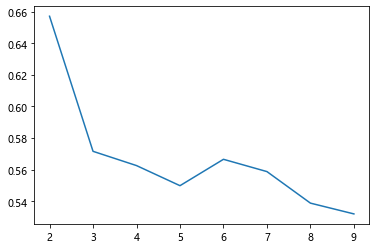

In [8]:
plt.plot(range(2,10),y2)
plt.show()
# 最优的是 2

#### （5）在聚类数目为2到10类时，绘制Calinski_harabasz指数折线图，并确定最优聚类数目。

In [9]:
from sklearn.metrics import calinski_harabasz_score
y3 = []
for k in range(2,10):
    wine_model = KMeans(n_clusters=k).fit(wine)
    y = calinski_harabasz_score(wine_data,wine_model.labels_)
    print(k,y)
    y3.append(y)

2 505.57990220835353
3 562.1276808960521
4 708.0647955474864
5 788.1700764499993
6 902.2999687387519
7 1191.6876665029138
8 1295.6307261223596
9 1360.7877042810853


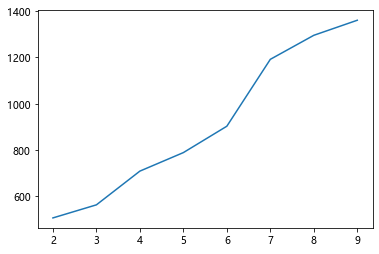

In [10]:
plt.plot(range(2,10),y3)
plt.show()
# 最优的是 9